<center><h1> PICU EDA </h1></center>
<center><h3> Landneyker Betancourth </h3></center>
<center><h3> Diego Baquero </h3></center>

## Import libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

from plotly.subplots import make_subplots
from sklearn.decomposition import PCA

%matplotlib inline

## Uploading files

In [2]:
picu_df = pd.read_csv('./Data/PICU.csv')

## Viewing the dataset

In [3]:
len(picu_df)

94678

In [4]:
picu_df.head()

,No. Patients,Age,Weight (Kg),Height (cms),Genero,Diagnosis,Outcome,Hour event (seconds),Heart Rate,oxygen saturation,Respiratory Rate,Systolic Blood Pressure,"Diastolic Blood Pressure,",Mean Blood Pressure
0,1,2 months,5.5,60.0,female,myocarditis,survived,18:52,138,92,36,100,56,73
1,1,2 months,5.5,60.0,female,myocarditis,survived,18:53,142,92,31,99,53,69
2,1,2 months,5.5,60.0,female,myocarditis,survived,18:54,139,92,31,99,52,68
3,1,2 months,5.5,60.0,female,myocarditis,survived,18:55,142,92,29,97,51,66
4,1,2 months,5.5,60.0,female,myocarditis,survived,18:56,144,92,25,102,56,71


## Plot functions

Bar chart:

In [5]:
def bar_chart(df, col, color_plot=px.colors.sequential.Plasma, description=""):
  df_count = df[col].value_counts().reset_index()
  df_count.columns = [col, "count"]
  colors = color_plot
  
  fig = make_subplots()

  fig.add_trace(go.Bar(x=df_count[col].values, 
                y=df_count["count"].values,
                marker=dict(color=colors)
                ), row=1, col=1)
  fig.update_layout(title= col + " - Count plots " + str(description))  
  fig.show()

Bar Pie Chart:

In [6]:
def bar_pie_chart(df, col, color_plot=px.colors.sequential.Plasma, description=""):
  df_count = df[col].value_counts().reset_index()
  df_count.columns = [col, "count"]
  colors = color_plot
  fig = make_subplots(1,2, specs=[[{"type": "bar"}, {"type": "pie"}]])
  
  fig.add_trace(go.Bar(
          x=df_count[col].values, 
          y=df_count["count"].values,
          marker=dict(color=colors)
            
  ), row=1, col=1)

  fig.add_trace(go.Pie(
          labels = df_count[col].values,
          values = df_count["count"].values,
          marker=dict(colors=colors)
  ), row=1, col=2)

  fig.update_layout(title= col + " - Count plots " + str(description))
  fig.show()

Histogram:

In [7]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

Correlation matrix:

In [8]:
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

## Def functions

In [9]:
def descibe_by(df, col_1, min_col_1, max_col_1, col_2, min_col_2, max_col_2, out):
  """
  """
  df_col_1 = df.loc[(df[col_1] >= min_col_1) & (df[col_1] < max_col_1)]
  df_min = df_col_1.loc[(df_col_1[col_2] < min_col_2)]
  df_max = df_col_1.loc[(df_col_1[col_2] > max_col_2)]
  df_avg = df_col_1.loc[(df_col_1[col_2] >= min_col_2) & (df_col_1[col_2] <= max_col_2)]
  print(str(min_col_1)+"-"+str(max_col_1)+" "+col_1+" and "+str(min_col_2)+"-"+str(max_col_2)+" "+col_2)
  bar_pie_chart(df_min, out, description=str(min_col_1)+"-"+str(max_col_1)+" "+col_1+" and less than "+str(min_col_2)+" "+col_2)
  bar_pie_chart(df_max, out, description=str(min_col_1)+"-"+str(max_col_1)+" "+col_1+" and more than "+str(max_col_2)+" "+col_2)
  bar_pie_chart(df_avg, out, description=str(min_col_1)+"-"+str(max_col_1)+" "+col_1+" and "+col_2+" between "+str(min_col_2)+"-"+str(max_col_2))

## Data cleansing

- Replacing missing and wrong values.
- Rename columns.

Checking for null values:

In [10]:
picu_df.isnull().sum()

No. Patients                     0
Age                              0
Weight (Kg)                      0
Height (cms)                  7404
Genero                           0
Diagnosis                        0
Outcome                          0
Hour event (seconds)             0
Heart Rate                       0
oxygen saturation                0
Respiratory Rate                 0
Systolic Blood Pressure          0
Diastolic Blood Pressure,        0
Mean Blood Pressure              0
dtype: int64

Age in years:

In [11]:
picu_df["Age"].unique()

array(['2 months', '5 months', '7 months', '15 years', '4 months',
       '2 years', '5years', '14 years', '11months', '12 years',
       '6 months', '16 years', '6years', '3 years', '8months', '10months',
       '17 years', '3.5 years', '2,5 years', '4 years', '12 months',
       '3 months', '2,6 years', '13 años', '8 months', '3.2 years',
       '7years'], dtype=object)

In [12]:
picu_df["Age"] = picu_df["Age"].replace(["2 months"], 0.16)
picu_df["Age"] = picu_df["Age"].replace(["3 months"], 0.3)
picu_df["Age"] = picu_df["Age"].replace(["4 months"], 0.33)
picu_df["Age"] = picu_df["Age"].replace(["5 months"], 0.41)
picu_df["Age"] = picu_df["Age"].replace(["6 months"], 0.5)
picu_df["Age"] = picu_df["Age"].replace(["7 months"], 0.58)
picu_df["Age"] = picu_df["Age"].replace(["8 months"], 0.66)
picu_df["Age"] = picu_df["Age"].replace(["8months"], 0.66)
picu_df["Age"] = picu_df["Age"].replace(["10months"], 0.83)
picu_df["Age"] = picu_df["Age"].replace(["12 months"], 1)
picu_df["Age"] = picu_df["Age"].replace(["11months"], 0.91)

picu_df["Age"] = picu_df["Age"].replace(["2 years"], 2)
picu_df["Age"] = picu_df["Age"].replace(["2,5 years"], 2.5)
picu_df["Age"] = picu_df["Age"].replace(["2,6 years"], 2.6)
picu_df["Age"] = picu_df["Age"].replace(["3 years"], 3)
picu_df["Age"] = picu_df["Age"].replace(["3.5 years"], 3.5)
picu_df["Age"] = picu_df["Age"].replace(["3.2 years"], 3.2)
picu_df["Age"] = picu_df["Age"].replace(["4 years"], 4)
picu_df["Age"] = picu_df["Age"].replace(["5years"], 5)
picu_df["Age"] = picu_df["Age"].replace(["6years"], 6)
picu_df["Age"] = picu_df["Age"].replace(["7years"], 7)
picu_df["Age"] = picu_df["Age"].replace(["12 years"], 12)
picu_df["Age"] = picu_df["Age"].replace(["13 años"], 13)
picu_df["Age"] = picu_df["Age"].replace(["14 years"], 14)
picu_df["Age"] = picu_df["Age"].replace(["15 years"], 15)
picu_df["Age"] = picu_df["Age"].replace(["16 years"], 16)
picu_df["Age"] = picu_df["Age"].replace(["17 years"], 17)

Rename column year:

In [13]:
picu_df.rename(columns = {"Age": "Age (years)"}, inplace = True)

Height NaN values:
- Avg by age.

In [14]:
picu_df["Height (cms)"].unique()

array([ 60.,  45.,  64., 150.,  52.,  nan,  62., 100., 160.,  80.,  66.,
       108.,  72., 145.,  55.,  86.,  90.,  95.,  88., 105., 110.,  65.,
       170., 115., 155.,  89., 153., 140., 120.,  97.,  67.])

In [15]:
df_null_height = picu_df.loc[(picu_df["Height (cms)"].isnull() == True)]

In [16]:
def height_avg_by_age(df, age):
  df.dropna()
  df = df.loc[(df["Age (years)"] <= age+0.5) & (df["Age (years)"] >= age-0.5)]
  mean_height = df["Height (cms)"].mean()
  return mean_height

Replace mean height values:

In [17]:
for i in df_null_height["No. Patients"].unique():
  new_df = df_null_height.loc[(df_null_height["No. Patients"])==i]
  idx = new_df.index[0]
  mean_height = height_avg_by_age(picu_df, picu_df["Age (years)"][idx])
  # Replace mean height values:
  for j in new_df.index:
    picu_df["Height (cms)"][j] = round(mean_height, 1)

In [18]:
picu_df["Height (cms)"].unique()

array([ 60. ,  45. ,  64. , 150. ,  52. ,  96.6,  62. , 100. , 160. ,
        80. ,  66. , 108. ,  72. , 145. ,  55. ,  86. ,  90. ,  95. ,
        88. , 105. , 110. ,  65. , 170. , 103.4, 115. , 155. ,  89. ,
       153. , 102.6,  58.3, 140. , 120. ,  97. ,  67. ])

In [19]:
picu_df.loc[(picu_df["Height (cms)"].isnull() == True)]

,No. Patients,Age (years),Weight (Kg),Height (cms),Genero,Diagnosis,Outcome,Hour event (seconds),Heart Rate,oxygen saturation,Respiratory Rate,Systolic Blood Pressure,"Diastolic Blood Pressure,",Mean Blood Pressure


Rename column: 'Diastolic Blood Pressure'

In [20]:
picu_df.rename(columns = {'Diastolic Blood Pressure, ':'Diastolic Blood Pressure'}, inplace = True)

Oxygen saturation:

In [21]:
picu_df["oxygen saturation"].unique()

array(['92', '94', '93', '91', '95', '96', '87', '90', '85', '89', '88',
       '86', '84', '81', '77', '82', '80', '74', '69', '99', '100', '78',
       '76', '75', '73', '66', '79', '64', '97', '98', '83', '70', '72',
       '61', '52', '50', '62', '71', '23', '68', '65', '3', '0', '34',
       '31', '35', '37', '38', '45', '55', '60', '20', '67', '40', '57',
       '58', '8', '945', '63', '44', '56', '53', '54', '59', '51', '41',
       '46', '47', '33', '32', '25', '10', '11', '27', '22', '14', '42',
       '48', '28', '1', 'NORMAL', '39', '30'], dtype=object)

In [22]:
picu_df["oxygen saturation"] = picu_df["oxygen saturation"].replace(["NORMAL"], '95')

Column values to int:

In [23]:
picu_df['oxygen saturation'] = picu_df['oxygen saturation'].astype(int)

In [24]:
picu_df["oxygen saturation"].unique()

array([ 92,  94,  93,  91,  95,  96,  87,  90,  85,  89,  88,  86,  84,
        81,  77,  82,  80,  74,  69,  99, 100,  78,  76,  75,  73,  66,
        79,  64,  97,  98,  83,  70,  72,  61,  52,  50,  62,  71,  23,
        68,  65,   3,   0,  34,  31,  35,  37,  38,  45,  55,  60,  20,
        67,  40,  57,  58,   8, 945,  63,  44,  56,  53,  54,  59,  51,
        41,  46,  47,  33,  32,  25,  10,  11,  27,  22,  14,  42,  48,
        28,   1,  39,  30])

Outcome:

In [25]:
picu_df["Outcome"] = picu_df["Outcome"].replace(["survived"], 1)
picu_df["Outcome"] = picu_df["Outcome"].replace(["dead"], 0)

Genre:

In [26]:
picu_df["Genero"] = picu_df["Genero"].replace(["female"], 0)
picu_df["Genero"] = picu_df["Genero"].replace(["male"], 1)

Checking for NaN values:

In [27]:
picu_df.isnull().sum()

No. Patients                0
Age (years)                 0
Weight (Kg)                 0
Height (cms)                0
Genero                      0
Diagnosis                   0
Outcome                     0
Hour event (seconds)        0
Heart Rate                  0
oxygen saturation           0
Respiratory Rate            0
Systolic Blood Pressure     0
Diastolic Blood Pressure    0
Mean Blood Pressure         0
dtype: int64

Fixed dataset:

In [28]:
picu_df.head()

,No. Patients,Age (years),Weight (Kg),Height (cms),Genero,Diagnosis,Outcome,Hour event (seconds),Heart Rate,oxygen saturation,Respiratory Rate,Systolic Blood Pressure,Diastolic Blood Pressure,Mean Blood Pressure
0,1,0.16,5.5,60.0,0,myocarditis,1,18:52,138,92,36,100,56,73
1,1,0.16,5.5,60.0,0,myocarditis,1,18:53,142,92,31,99,53,69
2,1,0.16,5.5,60.0,0,myocarditis,1,18:54,139,92,31,99,52,68
3,1,0.16,5.5,60.0,0,myocarditis,1,18:55,142,92,29,97,51,66
4,1,0.16,5.5,60.0,0,myocarditis,1,18:56,144,92,25,102,56,71


## Distribution graphs

### Plot per colum distribution

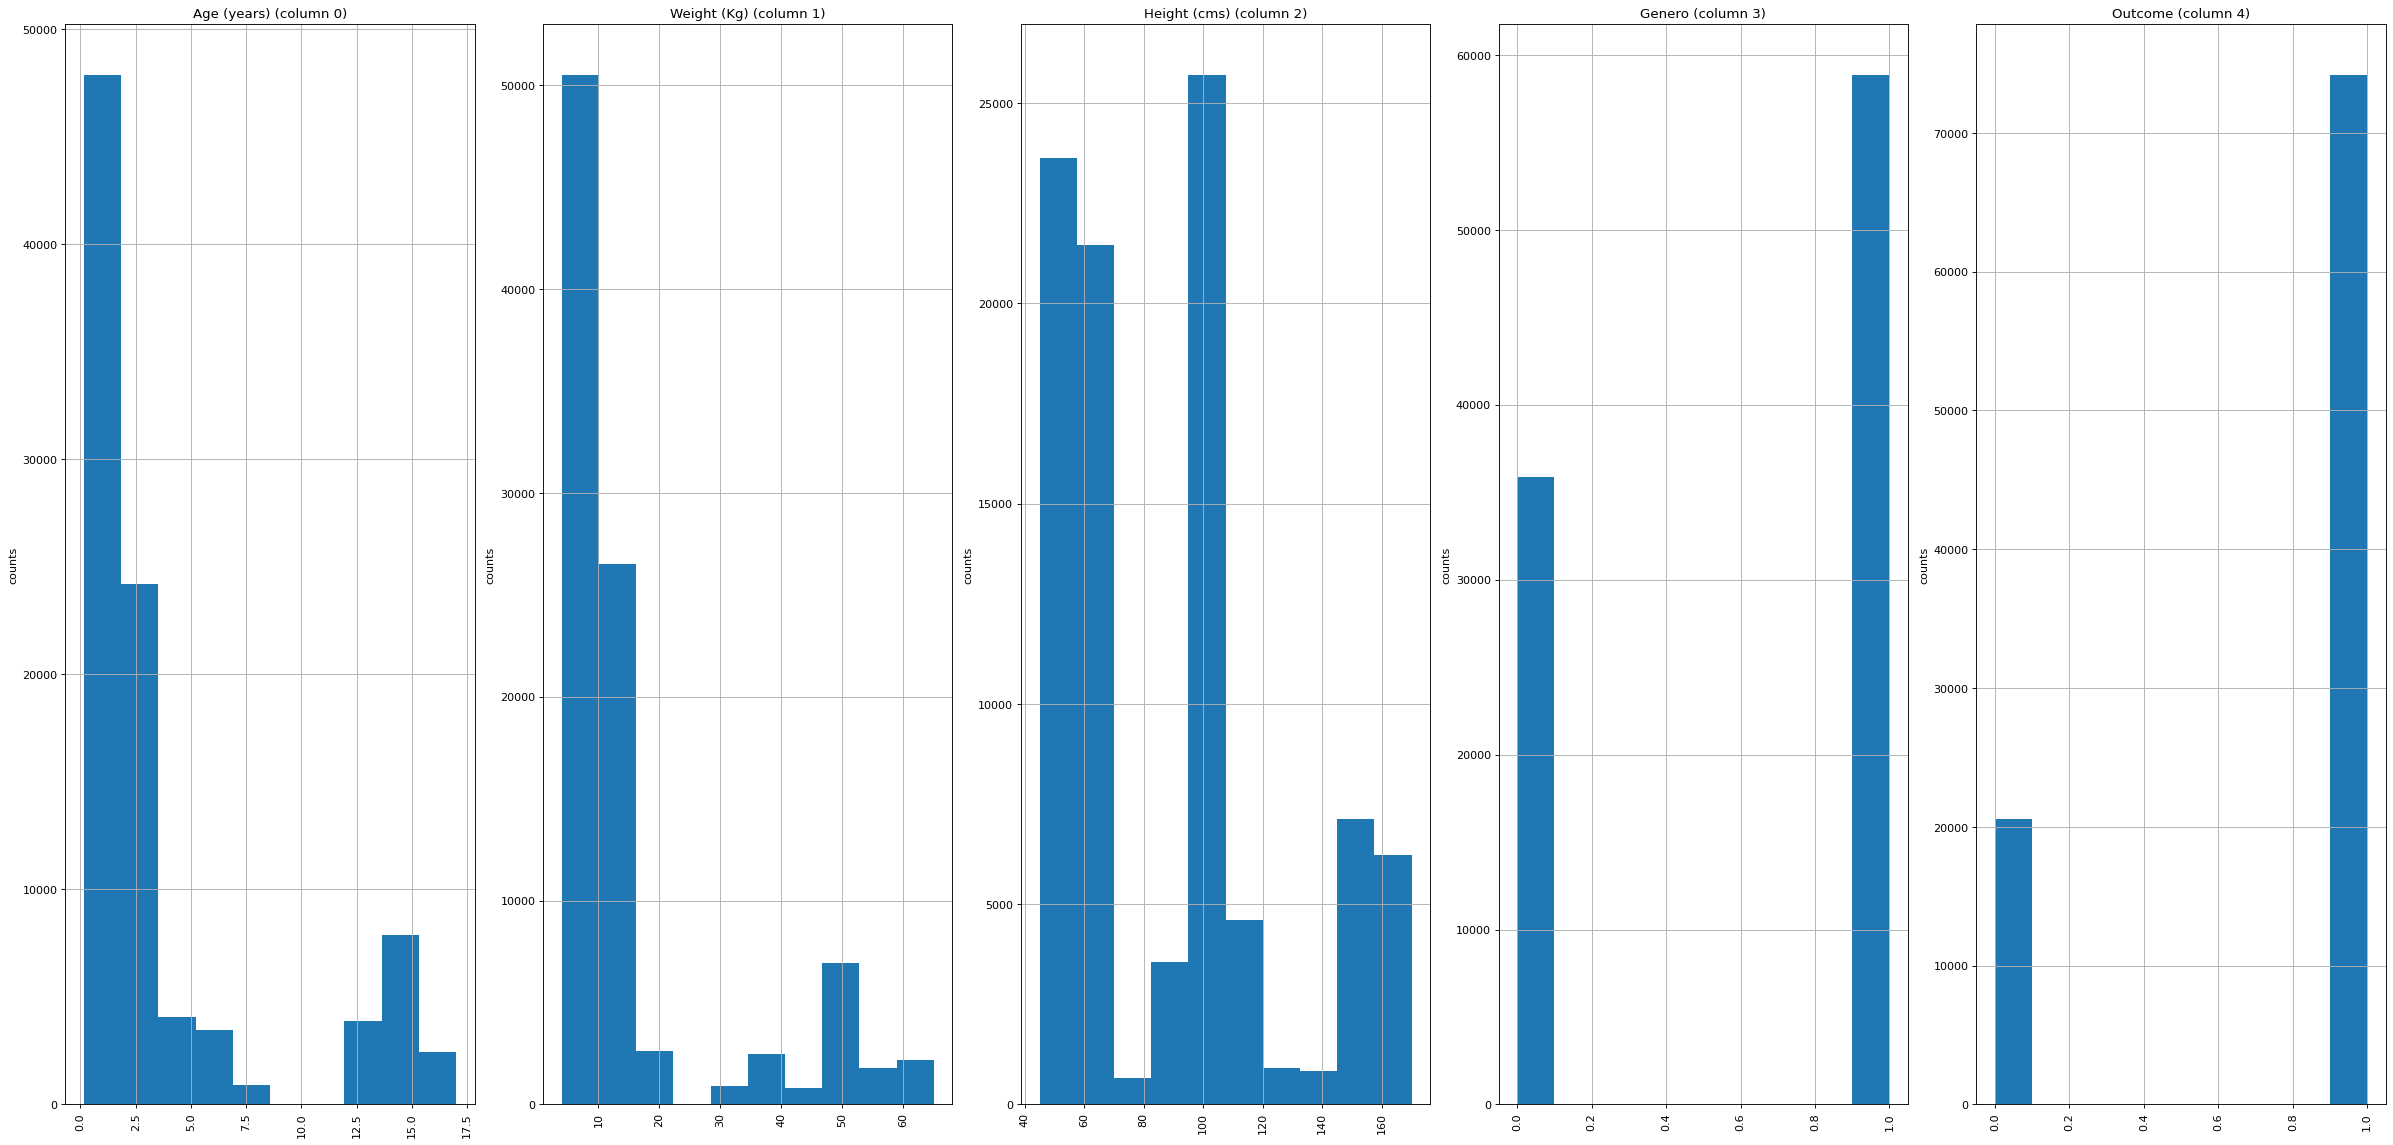

In [29]:
plotPerColumnDistribution(picu_df, 10, 5)

### Genero distribution

In [30]:
bar_pie_chart(picu_df, "Genero", px.colors.sequential.Agsunset[:6])

### Outcome distribution

In [31]:
bar_pie_chart(picu_df, "Outcome", px.colors.sequential.Agsunset[:6])

### Weight distribution

In [32]:
bar_chart(picu_df, "Weight (Kg)", px.colors.sequential.thermal)

### Height distribution

In [33]:
bar_chart(picu_df, "Height (cms)", px.colors.sequential.thermal)

### Diagnosis distribution

In [34]:
bar_chart(picu_df, "Diagnosis", px.colors.sequential.thermal)

### Heart rate distribution

In [35]:
bar_chart(picu_df, "Heart Rate", px.colors.sequential.Plasma)

In [36]:
picu_df.loc[(picu_df["Age (years)"] == 1)]

,No. Patients,Age (years),Weight (Kg),Height (cms),Genero,Diagnosis,Outcome,Hour event (seconds),Heart Rate,oxygen saturation,Respiratory Rate,Systolic Blood Pressure,Diastolic Blood Pressure,Mean Blood Pressure
68984,66,1.0,10.0,89.0,1,pneumonia,0,2:01,133,73,24,109,53,72
68985,66,1.0,10.0,89.0,1,pneumonia,0,2:02,133,88,24,109,53,72
68986,66,1.0,10.0,89.0,1,pneumonia,0,2:03,134,87,31,109,53,72
68987,66,1.0,10.0,89.0,1,pneumonia,0,2:04,140,86,33,109,53,72
68988,66,1.0,10.0,89.0,1,pneumonia,0,2:05,137,87,41,109,53,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69305,66,1.0,10.0,89.0,1,pneumonia,0,7:22,0,0,0,0,0,0
69306,66,1.0,10.0,89.0,1,pneumonia,0,7:23,0,0,0,0,0,0
69307,66,1.0,10.0,89.0,1,pneumonia,0,7:24,0,0,0,0,0,0
69308,66,1.0,10.0,89.0,1,pneumonia,0,7:25,0,0,9,0,0,0


In [37]:
picu_df["Age (years)"].describe()

count    94678.000000
mean         3.489270
std          4.776331
min          0.160000
25%          0.330000
50%          0.910000
75%          3.500000
max         17.000000
Name: Age (years), dtype: float64

Typical normal resting heart rate ranges are: 

| Index | Age range | Heart Rate (BPM) |
|---|---|---|
| 0 | Newborn | 100-16 |
| 1 | 0-5 months | 90-15 |
| 2 | 6-12 months	| 80-140 |
| 3 | 1-3 years |	80-130 |
| 4 | 3-5 years |	80-120 |
| 5 | 6-10 years | 70-110 |
| 6 | 11-14 years	| 60-105 |
| 7 | 15 years and older | 60-100 |

[**Heart rate ref**](https://www.emedicinehealth.com/what_is_a_good_heart_rate_for_my_age/article_em.htm)

#### Heart rate (birth to 5 months of age):
- 90-150.

In [38]:
descibe_by(picu_df, col_1="Age (years)", min_col_1=0, max_col_1=0.5, col_2="Heart Rate", min_col_2=90, max_col_2=150, out="Outcome")

0-0.5 Age (years) and 90-150 Heart Rate


#### Heart rate (6-12 months of age):
- 80-140.

In [39]:
descibe_by(picu_df, col_1="Age (years)", min_col_1=0.5, max_col_1=1, col_2="Heart Rate", min_col_2=80, max_col_2=140, out="Outcome")

0.5-1 Age (years) and 80-140 Heart Rate


#### Heart rate (1-3 years of age):
- 80-130.

In [40]:
descibe_by(picu_df, col_1="Age (years)", min_col_1=1, max_col_1=3, col_2="Heart Rate", min_col_2=80, max_col_2=130, out="Outcome")

1-3 Age (years) and 80-130 Heart Rate


#### Heart rate (3-5 years of age):
- 80-120.

In [41]:
descibe_by(picu_df, col_1="Age (years)", min_col_1=3, max_col_1=5, col_2="Heart Rate", min_col_2=80, max_col_2=120, out="Outcome")

3-5 Age (years) and 80-120 Heart Rate


#### Heart rate (6-10 years of age):
- 70-110.

In [42]:
descibe_by(picu_df, col_1="Age (years)", min_col_1=6, max_col_1=10, col_2="Heart Rate", min_col_2=70, max_col_2=110, out="Outcome")

6-10 Age (years) and 70-110 Heart Rate


#### Heart rate (11-14 years of age):
- 60-105.

In [43]:
descibe_by(picu_df, col_1="Age (years)", min_col_1=11, max_col_1=14, col_2="Heart Rate", min_col_2=60, max_col_2=105, out="Outcome")

11-14 Age (years) and 60-105 Heart Rate


#### Heart rate (15 years and older):
- 60-100.

In [44]:
descibe_by(picu_df, col_1="Age (years)", min_col_1=15, max_col_1=17, col_2="Heart Rate", min_col_2=60, max_col_2=100, out="Outcome")

15-17 Age (years) and 60-100 Heart Rate


## Correlation matrix

In [46]:
df1 = pd.read_csv('./Data/PICU.csv')
df1.dataframeName = './Data/PICU.csv'

In [47]:
corr = picu_df.corr()
corr

,No. Patients,Age (years),Weight (Kg),Height (cms),Genero,Outcome,Heart Rate,oxygen saturation,Respiratory Rate,Systolic Blood Pressure,Diastolic Blood Pressure,Mean Blood Pressure
No. Patients,1.000000,0.037799,0.067011,0.056904,0.002676,0.001161,-0.006647,0.000042,0.010795,-0.016761,0.019951,0.006273
Age (years),0.037799,1.000000,0.971591,0.918160,-0.409322,0.071756,-0.423239,0.059711,-0.019522,0.404124,0.434606,0.444137
Weight (Kg),0.067011,0.971591,1.000000,0.906447,-0.433159,0.112935,-0.404324,0.051922,-0.020731,0.394063,0.416002,0.427842
Height (cms),0.056904,0.918160,0.906447,1.000000,-0.459884,0.052141,-0.411363,0.080652,-0.045556,0.394896,0.438942,0.443725
Genero,0.002676,-0.409322,-0.433159,-0.459884,1.000000,-0.174015,0.220077,-0.028877,0.107697,-0.235520,-0.246482,-0.253734
Outcome,0.001161,0.071756,0.112935,0.052141,-0.174015,1.000000,0.180278,0.078697,-0.220770,0.085837,-0.069926,-0.010342
Heart Rate,-0.006647,-0.423239,-0.404324,-0.411363,0.220077,0.180278,1.000000,0.202876,0.344794,0.037054,-0.073393,-0.032616
oxygen saturation,0.000042,0.059711,0.051922,0.080652,-0.028877,0.078697,0.202876,1.000000,0.027803,0.391033,0.333461,0.374000
Respiratory Rate,0.010795,-0.019522,-0.020731,-0.045556,0.107697,-0.220770,0.344794,0.027803,1.000000,0.153454,0.133778,0.147613
Systolic Blood Pressure,-0.016761,0.404124,0.394063,0.394896,-0.235520,0.085837,0.037054,0.391033,0.153454,1.000000,0.795437,0.918394


In [48]:
corr.style.background_gradient(cmap='coolwarm')

,No. Patients,Age (years),Weight (Kg),Height (cms),Genero,Outcome,Heart Rate,oxygen saturation,Respiratory Rate,Systolic Blood Pressure,Diastolic Blood Pressure,Mean Blood Pressure
No. Patients,1.000000,0.037799,0.067011,0.056904,0.002676,0.001161,-0.006647,0.000042,0.010795,-0.016761,0.019951,0.006273
Age (years),0.037799,1.000000,0.971591,0.918160,-0.409322,0.071756,-0.423239,0.059711,-0.019522,0.404124,0.434606,0.444137
Weight (Kg),0.067011,0.971591,1.000000,0.906447,-0.433159,0.112935,-0.404324,0.051922,-0.020731,0.394063,0.416002,0.427842
Height (cms),0.056904,0.918160,0.906447,1.000000,-0.459884,0.052141,-0.411363,0.080652,-0.045556,0.394896,0.438942,0.443725
Genero,0.002676,-0.409322,-0.433159,-0.459884,1.000000,-0.174015,0.220077,-0.028877,0.107697,-0.235520,-0.246482,-0.253734
Outcome,0.001161,0.071756,0.112935,0.052141,-0.174015,1.000000,0.180278,0.078697,-0.220770,0.085837,-0.069926,-0.010342
Heart Rate,-0.006647,-0.423239,-0.404324,-0.411363,0.220077,0.180278,1.000000,0.202876,0.344794,0.037054,-0.073393,-0.032616
oxygen saturation,0.000042,0.059711,0.051922,0.080652,-0.028877,0.078697,0.202876,1.000000,0.027803,0.391033,0.333461,0.374000
Respiratory Rate,0.010795,-0.019522,-0.020731,-0.045556,0.107697,-0.220770,0.344794,0.027803,1.000000,0.153454,0.133778,0.147613
Systolic Blood Pressure,-0.016761,0.404124,0.394063,0.394896,-0.235520,0.085837,0.037054,0.391033,0.153454,1.000000,0.795437,0.918394


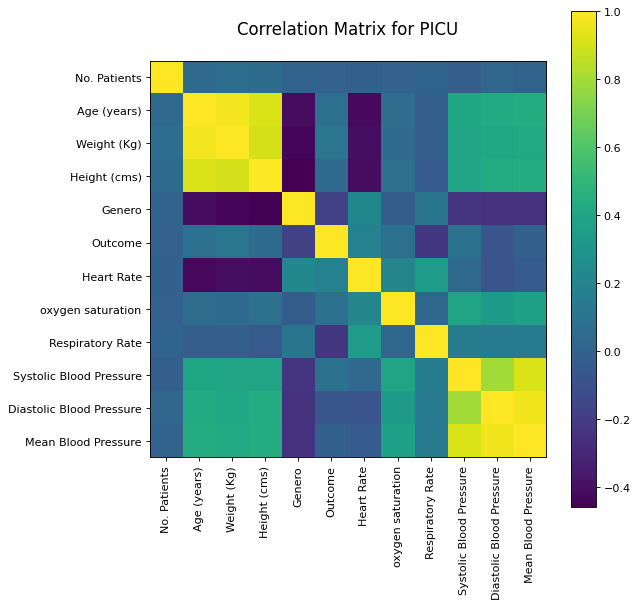

In [49]:
plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
corrMat = plt.matshow(corr, fignum = 1)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.gca().xaxis.tick_bottom()
plt.colorbar()
plt.title(f'Correlation Matrix for PICU', fontsize=15)
plt.show()

## Dimensionality reduction

### PCA

In [50]:
fix_df = picu_df.copy()
fix_df.drop(["Diagnosis", "Hour event (seconds)", "Systolic Blood Pressure", "Diastolic Blood Pressure"], inplace=True, axis=1)

In [51]:
# You must normalize the data before applying the fit method
fix_df = (fix_df - fix_df.mean()) / fix_df.std()
fix_df

,No. Patients,Age (years),Weight (Kg),Height (cms),Genero,Outcome,Heart Rate,oxygen saturation,Respiratory Rate,Mean Blood Pressure
0,-1.708822,-0.697035,-0.611740,-0.787805,-1.280902,0.526337,0.222658,0.009811,0.409038,0.022599
1,-1.708822,-0.697035,-0.611740,-0.787805,-1.280902,0.526337,0.358779,0.009811,0.053390,-0.215961
2,-1.708822,-0.697035,-0.611740,-0.787805,-1.280902,0.526337,0.256689,0.009811,0.053390,-0.275601
3,-1.708822,-0.697035,-0.611740,-0.787805,-1.280902,0.526337,0.358779,0.009811,-0.088869,-0.394881
4,-1.708822,-0.697035,-0.611740,-0.787805,-1.280902,0.526337,0.426840,0.009811,-0.373387,-0.096681
...,...,...,...,...,...,...,...,...,...,...
94673,1.707708,-0.625851,-0.453369,-0.588447,0.780692,-1.899903,-0.900338,-1.164850,-2.151626,-2.124443
94674,1.707708,-0.625851,-0.453369,-0.588447,0.780692,-1.899903,-0.900338,-1.164850,-2.151626,-2.124443
94675,1.707708,-0.625851,-0.453369,-0.588447,0.780692,-1.899903,-3.112301,-2.675130,-2.151626,-4.331125
94676,1.707708,-0.625851,-0.453369,-0.588447,0.780692,-1.899903,-3.792905,-5.192262,-2.151626,-4.331125


In [52]:
pca = PCA(n_components=fix_df.shape[1])
pca.fit(fix_df)

PCA(n_components=10)

In [53]:
# Reformat and view results
loadings = pd.DataFrame(pca.components_.T, 
                        columns=['PC%s' % _ for _ in range(len(fix_df.columns))],
                        index=fix_df.columns)

In [54]:
loadings

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
No. Patients,0.031581,0.009497,-0.064309,-0.971110,0.196408,-0.107297,-0.028820,0.017014,-0.005166,0.022043
Age (years),0.500688,0.001560,-0.078753,-0.011107,-0.095956,0.240921,0.104225,-0.112608,-0.332820,0.735813
Weight (Kg),0.499132,0.000109,-0.047127,-0.049115,-0.127285,0.222979,0.115129,-0.104272,-0.452426,-0.671935
Height (cms),0.495545,0.003042,-0.061832,-0.020042,-0.060158,0.136607,0.130757,-0.179823,0.820588,-0.071572
Genero,-0.303610,0.042954,-0.245062,-0.043836,0.207514,0.877022,-0.163841,0.021611,0.061421,-0.026187
Outcome,0.052106,0.031665,0.760733,-0.140458,-0.366988,0.267167,-0.148505,0.406192,0.065457,0.021248
Heart Rate,-0.262910,0.509381,0.187243,-0.103221,-0.343398,0.040351,0.044475,-0.709505,-0.024932,0.012149
oxygen saturation,0.061688,0.542994,0.262464,0.090834,0.574081,0.029292,0.510898,0.179596,-0.022410,-0.003408
Respiratory Rate,-0.050673,0.478405,-0.489545,-0.057741,-0.504743,-0.046745,0.158429,0.491510,0.043978,0.002354
Mean Blood Pressure,0.288493,0.462458,-0.035310,0.100587,0.228902,-0.129793,-0.788011,0.033581,-0.005969,-0.013142


In [55]:
loadings.style.background_gradient(cmap='coolwarm')

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
No. Patients,0.031581,0.009497,-0.064309,-0.971110,0.196408,-0.107297,-0.028820,0.017014,-0.005166,0.022043
Age (years),0.500688,0.001560,-0.078753,-0.011107,-0.095956,0.240921,0.104225,-0.112608,-0.332820,0.735813
Weight (Kg),0.499132,0.000109,-0.047127,-0.049115,-0.127285,0.222979,0.115129,-0.104272,-0.452426,-0.671935
Height (cms),0.495545,0.003042,-0.061832,-0.020042,-0.060158,0.136607,0.130757,-0.179823,0.820588,-0.071572
Genero,-0.303610,0.042954,-0.245062,-0.043836,0.207514,0.877022,-0.163841,0.021611,0.061421,-0.026187
Outcome,0.052106,0.031665,0.760733,-0.140458,-0.366988,0.267167,-0.148505,0.406192,0.065457,0.021248
Heart Rate,-0.262910,0.509381,0.187243,-0.103221,-0.343398,0.040351,0.044475,-0.709505,-0.024932,0.012149
oxygen saturation,0.061688,0.542994,0.262464,0.090834,0.574081,0.029292,0.510898,0.179596,-0.022410,-0.003408
Respiratory Rate,-0.050673,0.478405,-0.489545,-0.057741,-0.504743,-0.046745,0.158429,0.491510,0.043978,0.002354
Mean Blood Pressure,0.288493,0.462458,-0.035310,0.100587,0.228902,-0.129793,-0.788011,0.033581,-0.005969,-0.013142


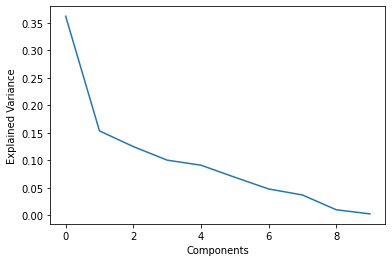

In [56]:
plt.plot(pca.explained_variance_ratio_)
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.show()

## Fixed correlation

In [57]:
corr_fix = fix_df.corr()

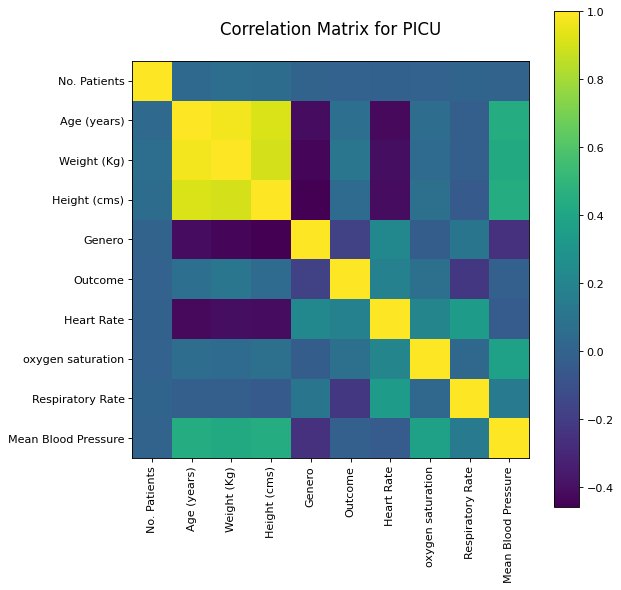

In [58]:
plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
corrMat = plt.matshow(corr_fix, fignum = 1)
plt.xticks(range(len(corr_fix.columns)), corr_fix.columns, rotation=90)
plt.yticks(range(len(corr_fix.columns)), corr_fix.columns)
plt.gca().xaxis.tick_bottom()
plt.colorbar()
plt.title(f'Correlation Matrix for PICU', fontsize=15)
plt.show()